# Graph Theory Questions for Jupyter-based Exam

## Instructions
1. You may use any source of information you can find, so long as you don't communicate with anyone else.
2. You can put your answers in the marked cells. If you prefer making multiple answer cells that's also ok, but make sure I know which question you're answering where.
3. You can split up code answers into multiple cells if you like, but keep them in order for me to grade!
3. You get partial points for partial answers. This means you can still get points for coding questions if you explain your reasoning, but don't manage the code itself.
4. You have 120 minutes total for the exam (unless you are eligible for "Special Facilities"), distribute it wisely amongst questions.
5. Remember you can look up the documentation of any function or object by appending "?" (question mark) to it without calling it with "()"; this is the same documentation as you'd look up on the internet! See an example in the next cell.
4. Unless specified otherwise you may assume graphs are simple and undirected.
6. Your final grade will be `score / 70 * 9 + 1`


# -- BEGIN EXAM --
Good luck!
*Don't forget to run the global imports defined in the next cell!!!*

In [2]:
# Global definitions you will need are here; RUN THIS CELL
# Define any extra global modules you want to add yourself here as well!
# As well as any extra helper functions you want to use in all exercises below.
import networkx as nx
import pickle
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Example for how to get documentation from within the notebook
nx.Graph?

## Question 1 (10pt)

Answer the following questions.

1. What is the definition of an Eulerian cycle?
1. What is the definition of a Hamiltonian cycle?
1. Given a graph consisting of $n$ nodes and $k$ edges, what is the size of the Eulerian cycle of this graph (assuming it exists)?
1. Given a graph consisting of $n$ nodes and $k$ edges, what is the size of the Hamiltonian cycle of this graph (assuming it exists)?
1. What criteria must a graph meet for an Eulerian cycle to exist? And an Eulerian tour?
1. Explain in your own words what the following means, given that the function $d(a, b)$ signifies the length of the  shortest path between nodes $a$ and $b$: $x = \max\limits_{u \in V} \max\limits_{v \in V} d(u, v) $. The quantity $x$ has a name; what is its name?
1. Explain in your own words what the following means, given that the function $d(a, b)$ signifies the length of the  shortest path between nodes $a$ and $b$: $y = \min\limits_{u \in V} \max\limits_{v \in V} d(u, v) $. The quantity $y$ has a name; what is its name?

In [4]:
## Answers to question 1
# 1. a eulerian cycle is a cycle every edge is visited only once but may repeat vertices
# 2. A hamilton cycle is almost the same as a eulerian cycle but instead it only visiteds the vertices once
# 3. It crosses k edges and k nodes
# 4. n nodes and n edges
# 5. every vertex has even degree, and all of its vertices with nonzero degree belong to a single connected component
# 6. The longest shortest path between any 2 nodes in a graph. This is the diameter of the graph
# 7. For each node, find the longest shortest path to any other node, then take the shortest. 
#  In other words, the radius of the graph

## Question 2 (20pt)

1. Take a look at the file "foodwebs.txt". It models the predatory relationships in a marine ecosystem ("who eats whom"). Each line in the file contains at least 2 values, separated by commas. The first value is a "Species", and all other values on the line are "Species they feed on". The latter lists for every species the other species in the table that they eat. (Except for the so-called "primary producers" like the seaweed Kelp which "eat" inorganic resources like sunlight. These have a prey list denoted "-"). For example, "Shark" eats "Sea otter"; and "Sea stars" eats "Abalone", "small herbivorous fishes", and "sea urchins". This web can be modeled as a digraph; the species are in vertices and arcs represent an "eaten by" relationship between two species (from prey to predator). Construct such a digraph by parsing the "foodwebs.txt" comma-separated-file and using the appropriate NetworkX objects. Plot this digraph as well and check that it is weakly connected.
  
  If you don't manage, use the following code snippet to continue. You will then get 0 points on this subquestion, however.
  ```py
  with open('foodweb.pickle', 'rb') as jar:
       digraph = pickle.load(jar)
  ```

2. Ecologists like to understand an ecosystem in terms of trophic levels, that is groups of predators which eat prey of comparable size/type (sometimes also called an ecological "niche"). Let's try to infer these trophic levels automatically from our dataset, using network methods. We can imagine two different methods:

  - The first possible definition of a trophic level of species X is: i. 0 if X is a primary producer in the food web (a species that does not consume any species in the food web). ii. k if the shortest path from a level 0 species to X is of length k.
  - The second possible definition of a trophic level of species X is: i. 0 if X is a primary producer in the food web (a species that does not consume any species in the food web). ii. k if the longest path from a level 0 species to X is of length k.
  
  Implement both these possible definitions as the functions "trophic_short" and "trophic_long" respectively and calculate the trophic level for all species in the foodweb with both functions.

3. Which of the two methods results in trophic levels which best matches the idea of a "trophic level" discussed above, of predators which feast on similar type/size of prey? Provide arguments for your answer!

['sea otter', 'shark', 'sea stars', 'sea urchins', 'large crabs', 'large fishes and octopus', 'abalone', 'small herbivorous fishes', 'sessile invertebrates', 'sea urchins kelp', 'organic debris', 'smaller predatory fishes and invertebrates', 'small herbivorous fishes and invertebrates', 'kelp', 'smaller predatory fishes', 'planktonic invertebrates kelp', 'small (herbivorous) fishes and invertebrates', '-', 'microscopic planktonic algae', 'planktonic invertebrates']


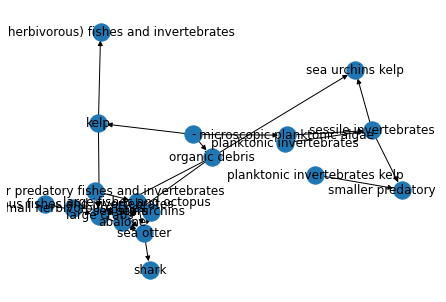

In [25]:
## Answers to Question 2
# 1. 
graph = nx.DiGraph()
with open ("foodweb.txt", "r") as file:
    for i in file:
        line = i.split(',')
        predator = line[0].casefold().strip()
        preys = line[1:]
        for prey in preys:
            single_prey = prey.casefold().strip()
            graph.add_edge(single_prey, predator)
print(graph.nodes)
nx.draw(graph, with_labels=True)

In [24]:
#2 
def trophic_short(graph):
    for node in graph:
        
        print(nx.shortest_path_length(graph, '-', node) -1)
trophic_short(graph)    

def trophic_longest(graph)
     for node in graph:
         path_length = nx.dag_longest_path_length(graph, '-', node) - 1

2
3
2


NetworkXNoPath: No path between - and sea urchins.

## Question 3 (20 pt)

The Davis southern women graph is constructed from data collected by Davis et al. in the 1930s. They tracked the attendence of a number of women to several social clubs.

1. Load the graph in the file "dwcg.gml". This file is in GML format. If you don't manage, use the following snippet to get 0 point at this subquestion: `graph = nx.davis_southern_women_graph()`.
1. What class/type of graph is this? Be as specific as possible
1. How many social clubs are there? How many women?
1. Plot a histogram of the sizes of the clubs, and a histogram of the number of clubs women are part of.
1. Which clubs have the most members in common?

there are 18 woman
there are 14 social clubs
['E8', 'E9'] are the two clubs with the most members in common. they have 9 members in common


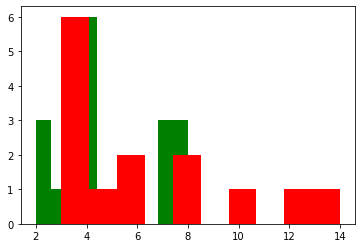

In [62]:
## Answers to Question 3
#1
graph = nx.read_gml('dswc(1).gml')
# nx.draw(graph)
#2 this is a bipartite graph where there is a group of woman and social clubs
#3
woman = {node for node in graph if graph.nodes[node]['bipartite'] == 0}
clubs = {node for node in graph if graph.nodes[node]['bipartite'] == 1}
print(f'there are {len(woman)} woman')
print(f'there are {len(clubs)} social clubs')
# 4
club_size = {}
for node in clubs:
    club_size[node] = graph.degree(node)
woman_clubs = {}
for node in woman:
    woman_clubs[node] = graph.degree(node)
plt.hist(woman_clubs.values(), color='g')   
plt.hist(club_size.values(), color='r')  

members_common = [[], 0]
for club1 in clubs:
    
    for club2 in clubs:
        
        if club1 == club2:
            continue
        set1 = set(graph[club1])
        set2 = set(graph[club2])
        if members_common[1] < len(set1.intersection(set2)):
            members_common = [[club1, club2],len(set1.intersection(set2))]
print(f'{members_common[0]} are the two clubs with the most members in common. they have {members_common[1]} members in common')
        

## Question 4 (20 pt)

Caveman graphs are defined as a graph consisting of $l$ disconnected cliques of size $k$. Networkx has a convenient function for generating these: `nx.caveman_graph`. In this caveman graph there are clear communities: the original cliques used to construct this graph. Finding communities in general is pretty hard, but in this specific case they are so obvious existing algorithms will (should) manage without issue. 

In this question you will investigate the quality of a few different embeddings algorithms using a caveman graph.

1. Write a function that does the following:

  a. Generate a caveman graph with l=5, k=10.
  
  b. Add random edges to the generated graph until the graph is connected and at least 20 edges have been added.

  If you don't manage, use the following snippet to get 0 points for this subquestion.
```py
    with open('caveman.pickle', 'rb') as jar:
        caveman_graph = pickle.load(jar)
```

2. Browse through the networkx documentation until you find an appropriate function to find the communities in your connected caveman graph. Make sure you find 5 communities of 10 nodes each. If you don't manage, use the following 5 communities: `{0-9}, {10-19}, {20-29}, {30-39}, {40-49}`.

3. In your own words, what is graph embedding? What are desirable properties for an embedding?

4. Embed your caveman graph. Use an existing networkx function.

5. Given the communities you found in 2., and the embedding you generated in 4., calculate for each community the average Euclidean distance between nodes within each community, and compare that to the Euclidean distances between communities. Note: For this question you do *not* need the distance in the graph (i.e. the number of edges between nodes), but the Euclidean distance in your embedding.
6. Is the embedding method you chose any good? Compare it with 2 other embedding methods. Does it matter in how many dimensions you embed the graph?


{0: array([ 0.31133292, -0.74558895]), 1: array([ 0.29088448, -0.67766479]), 2: array([ 0.29343839, -0.54863054]), 3: array([ 0.11895746, -0.49785581]), 4: array([ 0.35905339, -0.5340299 ]), 5: array([ 0.15937932, -0.69672205]), 6: array([ 0.23825544, -0.747389  ]), 7: array([ 0.15054386, -0.59208875]), 8: array([ 0.2037979 , -0.46993347]), 9: array([ 0.36186358, -0.68054564]), 10: array([-0.26858167, -0.52118515]), 11: array([-0.16496145, -0.47124089]), 12: array([-0.29053809, -0.38452971]), 13: array([-0.13912181, -0.33021423]), 14: array([-0.25048571, -0.45044396]), 15: array([-0.32249551, -0.45262865]), 16: array([-0.08109809, -0.35923978]), 17: array([-0.03074561, -0.41934711]), 18: array([-0.15546308, -0.54903172]), 19: array([-0.18686744, -0.20660721]), 20: array([0.39115166, 0.05011944]), 21: array([ 0.59302616, -0.05414493]), 22: array([0.50498129, 0.02405811]), 23: array([ 0.36431671, -0.13009112]), 24: array([0.56031059, 0.00244314]), 25: array([ 0.5084505 , -0.18976939]), 2

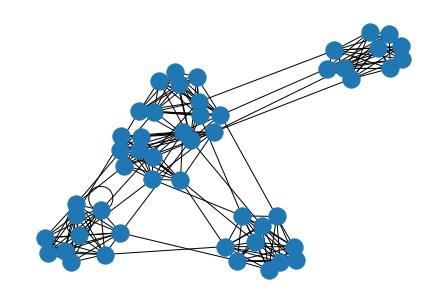

In [97]:
## Answers to Question 4
import networkx.algorithms.community as community
#1 
def make_cavemen_graph():
    graph = nx.caveman_graph(l=5, k=10)
    starting_edges = len(graph.edges)
    while True:
        random_node_1 = random.choice(list(graph.nodes))
        random_node_2 = random.choice(list(graph.nodes))
        graph.add_edge(random_node_1, random_node_2)
        if nx.is_connected(graph) and (len(graph.edges) - starting_edges) >= 20:
            break
    return graph     
test =make_cavemen_graph()
nx.draw(test)
#2 
# com = community.louvain_communities(test)
# community.louvain_communities(test)
#3 embedding is visualizing a graph in n-dimensional space. desirables properties is that nodes that are closely related are close together is said space.
#4 
embedding = nx.spring_layout(test)
print(embedding)

In [98]:
within_comm_distances = []
for community in communities:
    distances = []
    for node1 in community:
        for node2 in community:
            if node1 == node2: 
                continue
            distance = np.sqrt(np.sum((embedding[node1] - embedding[node2])**2))
            distances.append(distance)
    within_comm_distances.append(np.average(distances))
print(within_comm_distances)

for comm1 in communities:
    for comm2 in communities:
        if comm1 == comm2: 
            continue
        distances = []
        for node1 in comm1:
            for node2 in comm2:
                distance = np.sqrt(np.sum((embedding[node1] - embedding[node2])**2))
                distances.append(distance)
print(np.average(distances))
            

NameError: name 'communities' is not defined

# --- END OF EXAM ---
Congrats, you made it to the end of the exam! Don't forget to rename your ipynb to "GTReReExamSept_YOUR_NAME_STUDENTNR.ipynb" and hand it in via BlackBoard submit!